In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam-updated.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvenent
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [5]:
 df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [6]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['text'].duplicated().sum()

np.int64(403)

In [11]:
# Remove duplicate Values
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
# Null Values
df.isnull().sum()

target    0
text      0
dtype: int64

## 2. EDA

In [13]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

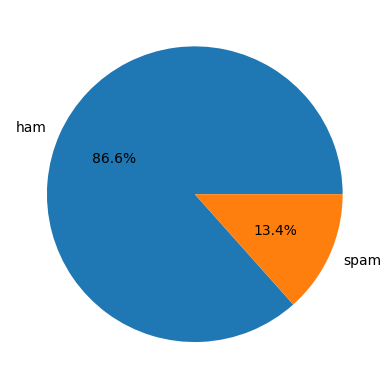

In [14]:
# To check data is balanced or imbalanced

import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

In [15]:
# Number of characters
df['num_characters']=df['text'].apply(len)

In [16]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# Adding new columns 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
# Adding column num_words: Number Of words in a message

df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
# Adding column num_sentences: Number Of sentences in a message

df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='num_characters', ylabel='Count'>

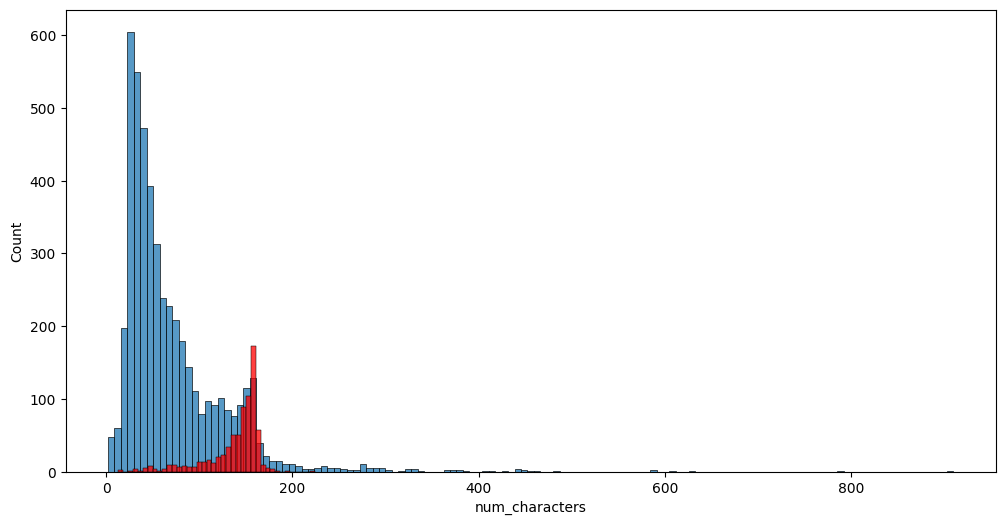

In [25]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

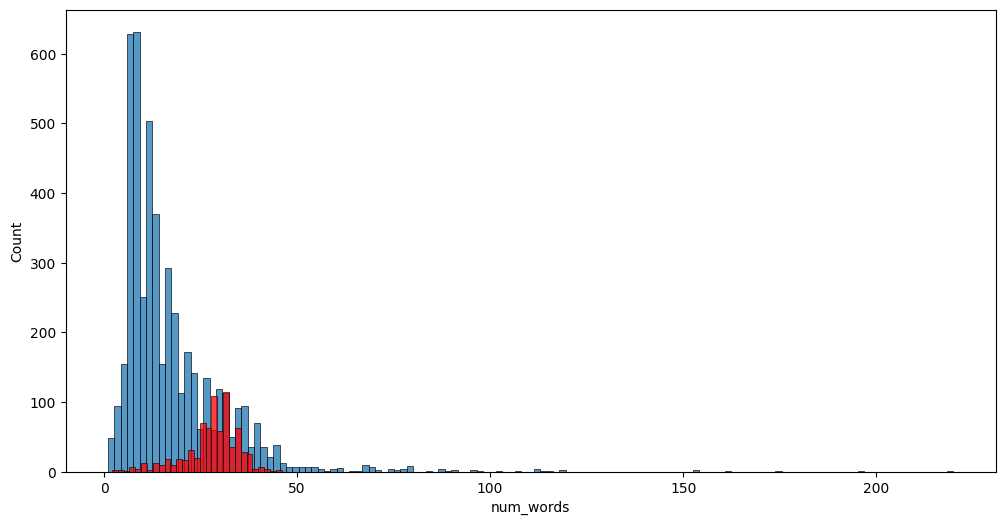

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color="red")

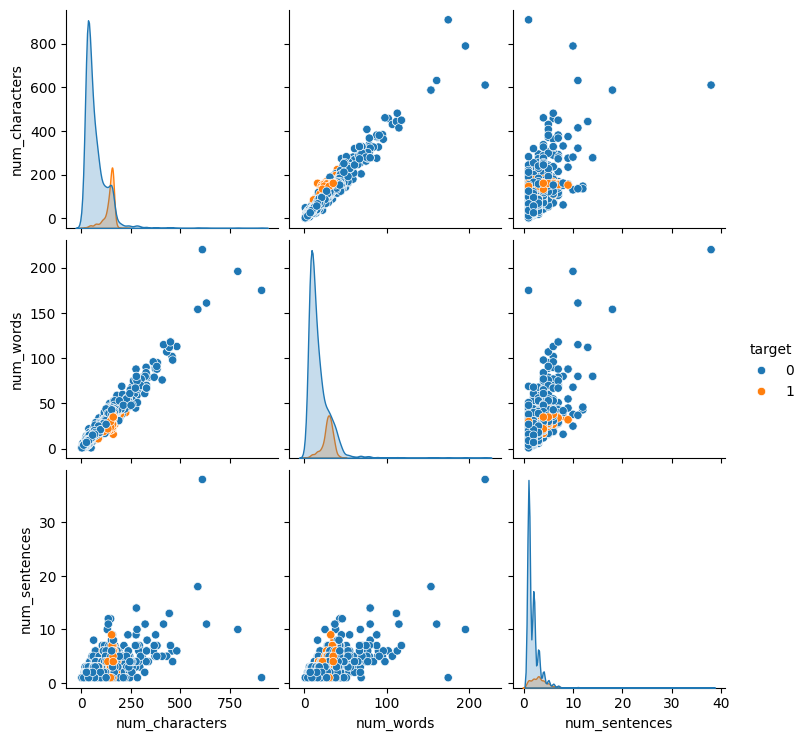

In [27]:
sns.pairplot(df,hue='target')

<Axes: >

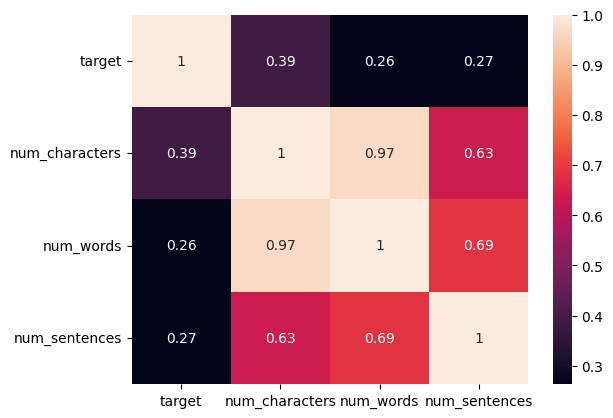

In [28]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [29]:
from nltk.corpus import stopwords
import string

In [30]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

## 3. Data Preprocessing
1. Lower Case
2. Tokenization
3. Removing Special Characters
4. Removing stopwords and punctuation
5. Stemming

In [31]:
def transform(text):
    
    # 1. Lower Case
    text=text.lower()
    
    # 2. Tokenization
    text=nltk.word_tokenize(text)
    
    # Removing Special Character
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    # Removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()

    # Remove Stemming
    for i in text:
        y.append(ps.stem(i))
    
    return ' '.join(y)

In [32]:
transform('Hi My name Is loving Mayank?')

'hi name love mayank'

In [33]:
df['transformed_text']=df['text'].apply(transform)

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


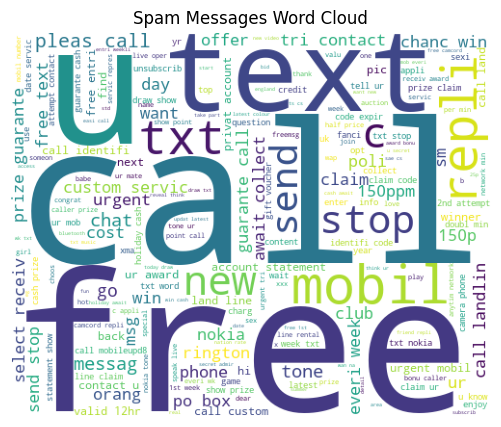

In [36]:
#Word Cloud of Spam Messages

from wordcloud import WordCloud
plt.figure(figsize=(10, 5))

wc = WordCloud(width=500, height=400, background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.axis('off')
plt.title("Spam Messages Word Cloud")
plt.show()

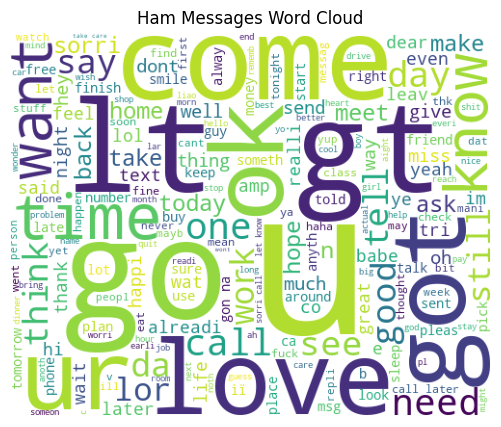

In [37]:
#Word Cloud of Ham Messages

plt.figure(figsize=(10, 5))

wc = WordCloud(width=500, height=400, background_color='white')
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.axis('off')
plt.title("Ham Messages Word Cloud")
plt.show()

In [38]:
# Merging all the messages present in spam messages

spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

11490

In [39]:
from collections import Counter

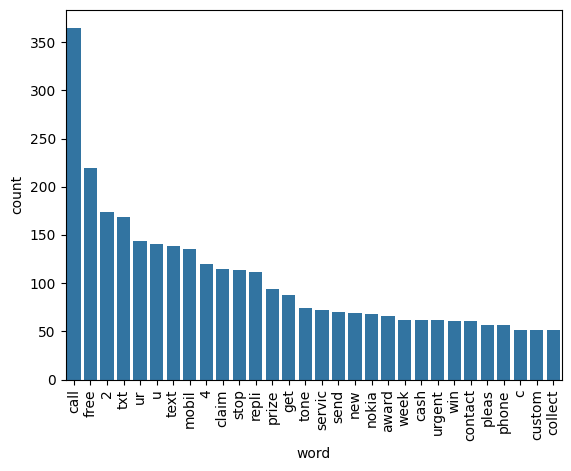

In [40]:

# Create the Counter and DataFrame
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot with proper keyword arguments
sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
# Merging all the messages present in ham messages

ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

38221

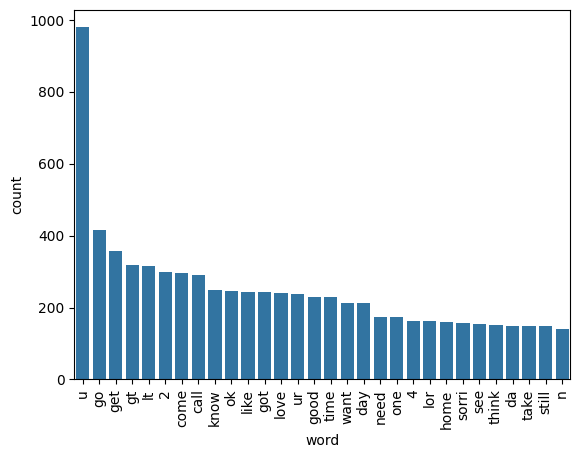

In [42]:
top_word= pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word',y='count',data=top_word)
plt.xticks(rotation='vertical')            
plt.show()

# Model Building

In [43]:
# Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [44]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
X.shape

(5572, 3000)

In [46]:
y=df['target'].values

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [49]:
# Model fit for Gaussian Naieve Bayes

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8654708520179372
[[840 117]
 [ 33 125]]
0.5165289256198347


In [50]:
# Model fit for Multinomial Naieve Bayes

mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [51]:
# Model fit for Bernoulli Naieve Bayes

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [52]:
# tfidf --> BNB

In [53]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [57]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [58]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9721973094170404, 0.9847328244274809)

In [59]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    

For  SVC
Accuracy -  0.9721973094170404
Precision -  0.9847328244274809
For  KN
Accuracy -  0.9049327354260089
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9273542600896861
Precision -  0.8737864077669902
For  LR
Accuracy -  0.9497757847533632
Precision -  0.9553571428571429
For  RF
Accuracy -  0.9695067264573991
Precision -  1.0
For  AdaBoost
Accuracy -  0.9121076233183857
Precision -  0.8947368421052632
For  BgC
Accuracy -  0.9623318385650225
Precision -  0.9328358208955224
For  ETC
Accuracy -  0.9721973094170404
Precision -  1.0
For  GBDT
Accuracy -  0.9399103139013453
Precision -  0.941747572815534
For  xgb
Accuracy -  0.9641255605381166
Precision -  0.9682539682539683


In [60]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [61]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904933,1.000000
8,ETC,0.972197,1.000000
5,RF,0.969507,1.000000
2,NB,0.965022,0.991736
0,SVC,0.972197,0.984733
10,xgb,0.964126,0.968254
4,LR,0.949776,0.955357
9,GBDT,0.939910,0.941748
7,BgC,0.962332,0.932836
6,AdaBoost,0.912108,0.894737


In [62]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [63]:
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [64]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [65]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.967713004484305
Precision 1.0


In [66]:
# Applying stacking
estimators=[('rf', rfc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [67]:
from sklearn.ensemble import StackingClassifier

In [68]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [69]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97847533632287
Precision 0.9652777777777778


In [70]:
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

In [71]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))